In [30]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv("twitter.csv")
df

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [32]:
df.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [34]:
df.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [35]:
df['labels'] = df['class'].map({0: 'hatespeech', 1:'offensive language', 2:'no hate or offensive language'})
df

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,no hate or offensive language
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",no hate or offensive language
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,6,0,6,0,1,youu got wild bitches tellin you lies,offensive language


In [36]:
data = df[['tweet', 'labels']]
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,no hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,"you've gone and broke the wrong heart baby, an...",no hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,youu got wild bitches tellin you lies,offensive language


In [37]:
import re
import nltk
import string
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))

In [38]:
stemmer = nltk.SnowballStemmer('english')

In [39]:
def clean(text):
    text = str(text).lower()
    text = re.sub('https?://\S+|www\S+', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\['
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\['
<>:8: SyntaxWarning: invalid escape sequence '\w'
/var/folders/ym/z8xbx4kd1snfyn80lxnf20mh0000gn/T/ipykernel_74167/2080788683.py:3: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\S+', '', text)
/var/folders/ym/z8xbx4kd1snfyn80lxnf20mh0000gn/T/ipykernel_74167/2080788683.py:4: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
/var/folders/ym/z8xbx4kd1snfyn80lxnf20mh0000gn/T/ipykernel_74167/2080788683.py:8: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w', '', text)


In [40]:
data.loc[:, 'tweet'] = data['tweet'].apply(clean)

In [41]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,no hate or offensive language
1,rt boy dat coldtyga dwn bad cuffin dat hoe p...,offensive language
2,rt urkindofbrand dawg rt ife ever fuck bitch ...,offensive language
3,rt cganderson vivabas look like tranni,offensive language
4,rt shenikarobert shit hear might true might f...,offensive language
...,...,...
24778,yous muthafin lie ifeask earl coreyemanuel rig...,offensive language
24779,youv gone broke wrong heart babi drove redneck...,no hate or offensive language
24780,young buck wanna eat dat nigguh like aint fuck...,offensive language
24781,youu got wild bitch tellin lie,offensive language


In [42]:
X = np.array(data['tweet'])
Y = np.array(data['labels'])

In [43]:
X

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe place',
       ' rt urkindofbrand dawg rt ife ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [45]:
cv = CountVectorizer()
X = cv.fit_transform(X)
X

<24783x27785 sparse matrix of type '<class 'numpy.int64'>'
	with 201432 stored elements in Compressed Sparse Row format>

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_test.shape)

(8179, 27785)


In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [48]:
Y_pred = dt.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 159,   41,  265],
       [  39, 1154,  186],
       [ 239,  254, 5842]])

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

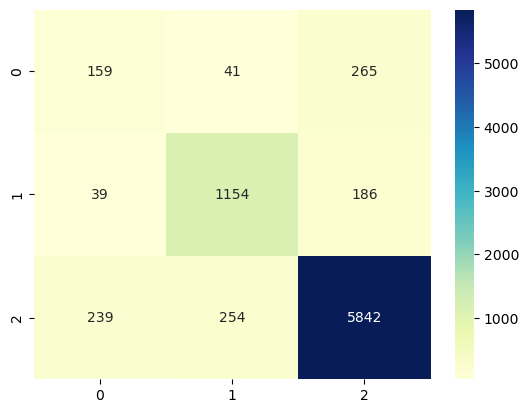

In [51]:
sns.heatmap(cm, annot = True, fmt='d', cmap='YlGnBu')

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8748013204548233

In [53]:
sample = "lets kill all the people who protest aginst the governement"

In [54]:
data1 = cv.transform([sample]).toarray()
data1

array([[0, 0, 0, ..., 0, 0, 0]])

In [55]:
dt.predict(data1)

array(['offensive language'], dtype=object)

In [56]:
import pickle

In [57]:
filename = 'models/trained_model.sav'
pickle.dump(dt, open(filename, 'wb'))

In [58]:
pickle.dump(cv, open('models/count_vectorizer.sav', 'wb'))